# Mall Customers Clustering Analysis

## Setting up data

In [61]:
import pandas as pd# Data Handling
import numpy as np# Data Handling
from sklearn.cluster import KMeans# Kmeans Algorithm
from sklearn.preprocessing import LabelEncoder# Converting the categorical to continous 
from sklearn.preprocessing import MinMaxScaler# Standarization 
from scipy.spatial.distance import cdist # Cluster Distance when to find optimal clusters
import seaborn as sns# Data Visualization 
import matplotlib.pyplot as plt # Data Visualization
#%matplotlib inline
import os # Working Directory

In [62]:
Customers = pd.read_csv(R'A:\Work\Course\Analytics\IVY Pro\Python\Part B Data Analysis\Clustering\PROJECT\Mall_Customers.csv')

## Exploratory Data Analysis

In [63]:
Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
Customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Lets look whether there is any missing value or not. It seems there is none, but its better to verify.

In [124]:
Missing_Values = Customers.isna().sum().reset_index()
Missing_Values.columns = ['Variable', 'Missing Value']

In [125]:
Missing_Values

,Variable,Missing Value
0,K_Clusters,0
1,CustomerID,0
2,Age,0
3,Annual Income (k$),0
4,Spending Score (1-100),0
5,Genre_Female,0
6,Genre_Male,0


**Hence we can see there is no missing value**

Lets explore the value counts and visualize the data

In [66]:
Customers.CustomerID.value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64

In [67]:
Customers.Age.value_counts().head(15)

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
Name: Age, dtype: int64

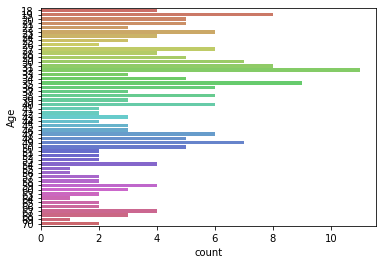

In [68]:
sns.countplot(y="Age", data=Customers,palette='hls')
plt.show()

C:\Users\Jaunty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


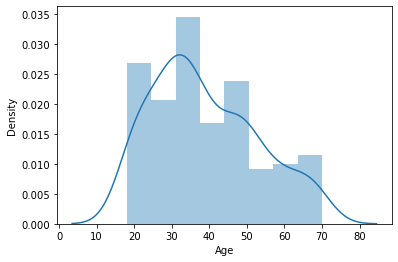

In [69]:
sns.distplot(Customers['Age'])
plt.show()

So we can see that mean age is 38 but maximum number of people are of bit lower ager like 32, 35,19 years of age. Hence it is skewed to the right

In [70]:
Customers['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

C:\Users\Jaunty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


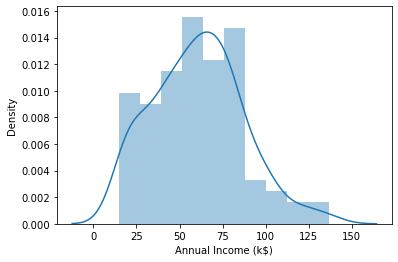

In [71]:
sns.distplot(Customers['Annual Income (k$)'])
plt.show()

By just looking at data it appeared that data was symmetrical. But now we can see it is not the case there is more data on lower end. Meaning not many people have high income and its just few people with income above 100k that are skewing the data towards right

In [72]:
Customers['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

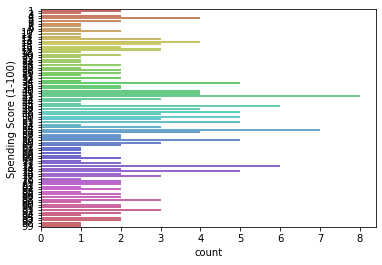

In [73]:
sns.countplot(y="Spending Score (1-100)", data=Customers,palette='hls')
plt.show()

C:\Users\Jaunty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


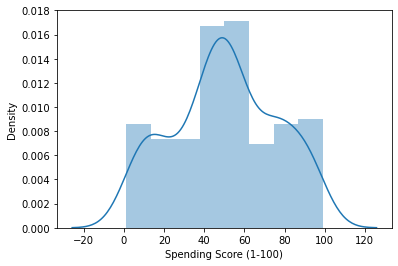

In [74]:
sns.distplot(Customers['Spending Score (1-100)'])
plt.show()

This seems to be equally distributed around mean, so we can say there is equal distribution of data. However we cannot say that data is normall shaped, because we dont have a proper bell curve. Its more like head and shoulders pattern. Where lareg amount of data is concentrated around mean and after that distribution of data is flat

## Summary Statistics of Data

In [75]:
Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
Agewise_Summary = Customers.groupby('Age').agg({'Annual Income (k$)':"mean",'Spending Score (1-100)':'mean'})
#We are looking age wise mean income and spending score
Agewise_Summary

,Annual Income (k$),Spending Score (1-100)
Age,,
18,51.250000,60.000000
19,57.000000,39.750000
20,41.600000,40.200000
21,38.800000,66.800000
22,31.333333,70.000000
23,41.500000,63.333333
24,39.250000,71.500000
25,57.666667,39.666667
26,58.000000,54.500000


So we can see that higher anual income is for later stage of life life 41 years of age by spending score is higher for younger generation

In [77]:
Genre_Wise_Summary = Customers.groupby("Genre").agg({'Annual Income (k$)':"mean",'Spending Score (1-100)':'mean'})
Genre_Wise_Summary
#Here we are looking Gendre wise summary

,Annual Income (k$),Spending Score (1-100)
Genre,,
Female,59.250000,51.526786
Male,62.227273,48.511364


This shows that male on an average has higher anual income but spending score is higher for female

## Working on categorical data

In [78]:
#labelEncoder = LabelEncoder()
#labelEncoder.fit(Customers['Genre'])
#Customers['Genre'] = labelEncoder.transform(Customers['Genre'])

Customers = pd.get_dummies(Customers, columns =['Genre'])

In [79]:
Customers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


Now for clustering we should remove customerID, as it is just identity, but if we will keep it. Our clustering will not be correct. Hence we should drop this variable

In [81]:
X = np.array(Customers.drop(['CustomerID'], 1).astype(float))

C:\Users\Jaunty\AppData\Local\Temp\ipykernel_19236\4085167762.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(Customers.drop(['CustomerID'], 1).astype(float))


In [88]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)

Lets use Elbow method to get optimal number of clusters

performing the clustering for k1


C:\Users\Jaunty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jaunty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


performing the clustering for k2
performing the clustering for k3
performing the clustering for k4
performing the clustering for k5
performing the clustering for k6
performing the clustering for k7
performing the clustering for k8
performing the clustering for k9
1 : 0.8167147408447056
2 : 0.40553484398215545
3 : 0.3589796046816035
4 : 0.3120036114813609
5 : 0.288267883056843
6 : 0.2625905691515879
7 : 0.24275810934770192
8 : 0.22743518122361162
9 : 0.2111364739434415
1 : 135.96148216035945
2 : 37.27227241211876
3 : 29.552857611943857
4 : 22.390960011928552
5 : 19.05733326166018
6 : 16.4156709816699
7 : 14.22930569502206
8 : 12.310918349165902
9 : 10.596344756574423


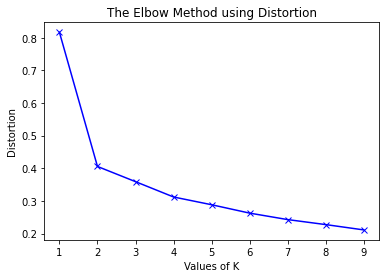

1 : 135.96148216035945
2 : 37.27227241211876
3 : 29.552857611943857
4 : 22.390960011928552
5 : 19.05733326166018
6 : 16.4156709816699
7 : 14.22930569502206
8 : 12.310918349165902
9 : 10.596344756574423


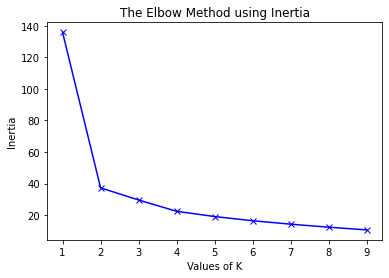

In [89]:
distortions = [] #It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.[Measure of Hetrogeneity]
inertias = [] # It is the sum of squared distances of samples to their closest cluster center.[Measure of Homogenity]
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 


#Based on Distortion  
for k in K:     
    #Building and fitting the model 
    #i=1
    print("performing the clustering for k"+ str(k))
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled) 
    kmeanModel.fit(X_scaled)     
      
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_scaled.shape[0] #Distortion Values
    mapping2[k] = kmeanModel.inertia_ #Inertia Values
    
    
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#Based on Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Here we have used distortion and inertia method. Distortion basically tells the distance between 2 separate clusters (By looking at the Euclidean distance between 2 clusters). We want this distance to be high. As number of clusters will increase the distance between 2 clusters will decrease and we chose the one where we have a kink.

While inertia looks at the distance between point in a cluster from the centroid of that respective cluster. So we want this distance to be low. We will chose the one where we have sharp kink

**So both inertia and distortion suggest that optimal number of clusters is 2**

## Creating Clusters

In [90]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
K_Clusters_Optimal = kmeans.predict(X_scaled)

In [93]:
Customers.insert(0, 'K_Clusters', K_Clusters_Optimal, True)

In [127]:
Customers

,K_Clusters,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,0,1,19,15,39,0,1
1,0,2,21,15,81,0,1
2,1,3,20,16,6,1,0
3,1,4,23,16,77,1,0
4,1,5,31,17,40,1,0
...,...,...,...,...,...,...,...
195,1,196,35,120,79,1,0
196,1,197,45,126,28,1,0
197,0,198,32,126,74,0,1
198,0,199,32,137,18,0,1


So we have created the clusters and also assigned a cluster to each data point. Now this is from k-means cluster. Lets also use Heirarichal clustering method

## Hierarchal Clustering 

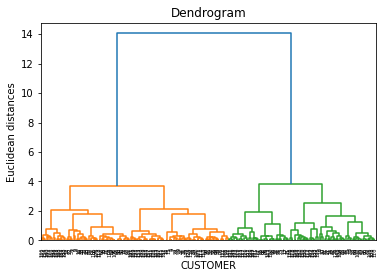

In [96]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = "ward"))
plt.title("Dendrogram")
plt.xlabel('CUSTOMER')
plt.ylabel('Euclidean distances')
plt.show()


**Even with hierarichal clustering we can see that optimal number of clusters are 2**

In [97]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
H_Cluster= cluster.fit_predict(X_scaled)

In [100]:
Customers.insert(1,'H_Cluster', H_Cluster, True)

In [101]:
Customers

,K_Clusters,H_Cluster,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,0,0,1,19,15,39,0,1
1,0,0,2,21,15,81,0,1
2,1,1,3,20,16,6,1,0
3,1,1,4,23,16,77,1,0
4,1,1,5,31,17,40,1,0
...,...,...,...,...,...,...,...,...
195,1,1,196,35,120,79,1,0
196,1,1,197,45,126,28,1,0
197,0,0,198,32,126,74,0,1
198,0,0,199,32,137,18,0,1


**So we can see that with both the methods we get optimal number of clusters as 2 and data points are assigned in 2 clusters in similar way from both the methods. So we can drop 1 column from the data set**

In [111]:
Customers.drop(['H_Cluster'], axis=1, inplace=True)

## Lets create 2 different data set for each cluster

In [112]:
Cluster_1 = Customers[Customers['K_Clusters']==1]
#Sales[Sales['BOROUGH'] == 1]

In [129]:
print("Cluster 1")
Cluster_1

Cluster 1


,K_Clusters,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
2,1,3,20,16,6,1,0
3,1,4,23,16,77,1,0
4,1,5,31,17,40,1,0
5,1,6,22,17,76,1,0
6,1,7,35,18,6,1,0
...,...,...,...,...,...,...,...
191,1,192,32,103,69,1,0
193,1,194,38,113,91,1,0
194,1,195,47,120,16,1,0
195,1,196,35,120,79,1,0


In [114]:
Cluster_0 = Customers[Customers['K_Clusters'] == 0]

In [115]:
Cluster_0

,K_Clusters,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,0,1,19,15,39,0,1
1,0,2,21,15,81,0,1
8,0,9,64,19,3,0,1
10,0,11,67,19,14,0,1
14,0,15,37,20,13,0,1
...,...,...,...,...,...,...,...
187,0,188,28,101,68,0,1
192,0,193,33,113,8,0,1
197,0,198,32,126,74,0,1
198,0,199,32,137,18,0,1
